In [120]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
tqdm.pandas()

In [2]:
!pip install rdkit

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python3 -m pip install --upgrade pip


In [3]:
moa_smiles=pd.read_csv('fourclass_smiles.csv',sep=';')
moa_smiles.head()

,Unnamed: 0,AreaShape_Area_nuclei,AreaShape_BoundingBoxArea_nuclei,AreaShape_BoundingBoxMaximum_X_nuclei,AreaShape_BoundingBoxMaximum_Y_nuclei,AreaShape_BoundingBoxMinimum_X_nuclei,AreaShape_BoundingBoxMinimum_Y_nuclei,AreaShape_Center_X_nuclei,AreaShape_Center_Y_nuclei,AreaShape_Compactness_nuclei,...,RadialDistribution_ZernikePhase_illumSYTO_9_9_cytoplasm,cbkid,batch_id,cmpd_conc,moa,grit,project,NAME,moa_encoded,SMILES
0,0,-1.298951,-0.498654,1.172667,-0.801881,1.241957,-0.853968,1.182454,-0.814591,0.067124,...,-2.238652,CBK308771,BJ1897173,10.0,EGFR inhibitor,5.053471,specs2k,Nazartinib,1,O=C(C1=CC(C)=NC=C1)NC2=NC3=CC=CC(Cl)=C3N2[C@H]...
1,1,-1.573862,-2.032150,-0.163187,-4.650908,-0.141776,-4.417712,-0.145290,-4.512957,-0.361411,...,-1.253604,CBK308771,BJ1897173,10.0,EGFR inhibitor,5.053471,specs2k,Nazartinib,1,O=C(C1=CC(C)=NC=C1)NC2=NC3=CC=CC(Cl)=C3N2[C@H]...
2,2,-1.202733,-1.420896,3.654621,-0.160376,3.676721,-0.114602,3.644091,-0.124212,2.889277,...,2.572879,CBK308771,BJ1897173,10.0,EGFR inhibitor,5.053471,specs2k,Nazartinib,1,O=C(C1=CC(C)=NC=C1)NC2=NC3=CC=CC(Cl)=C3N2[C@H]...
3,3,1.243969,0.026809,1.499040,0.405657,1.499043,0.617371,1.549532,0.445073,-0.760992,...,1.370972,CBK308771,BJ1897173,10.0,EGFR inhibitor,5.053471,specs2k,Nazartinib,1,O=C(C1=CC(C)=NC=C1)NC2=NC3=CC=CC(Cl)=C3N2[C@H]...
4,4,0.831604,-0.423588,0.899424,-0.420752,0.886572,-0.269869,0.879218,-0.338079,-4.136386,...,-2.319214,CBK308771,BJ1897173,10.0,EGFR inhibitor,5.053471,specs2k,Nazartinib,1,O=C(C1=CC(C)=NC=C1)NC2=NC3=CC=CC(Cl)=C3N2[C@H]...


In [4]:
moa_smiles['SMILES'].nunique()

111

In [5]:
!pip install transformers

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python3 -m pip install --upgrade pip


In [7]:
!pip install sentencepiece


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python3 -m pip install --upgrade pip


In [5]:
import sentencepiece
print(sentencepiece.__version__)

0.2.0


In [6]:
import torch
torch.cuda.is_available()

True

In [32]:
#tokenizer = T5Tokenizer.from_pretrained("laituan245/molt5-small", model_max_length=512)
#model = T5ForConditionalGeneration.from_pretrained('laituan245/molt5-small')
##unique_smiles = moa_smiles["SMILES"].drop_duplicates().tolist()
##input_ids = tokenizer(unique_smiles, return_tensors="pt").input_ids
##outputs = model.generate(input_ids, num_beams=5, max_length=512)
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#model.to(device)
#def generate_caption(smiles):
#    # Tokenize the input SMILES string and move to the correct device
#    inputs = tokenizer(smiles, return_tensors="pt").to(device)
#    
#    # Generate output using beam search
#    outputs = model.generate(inputs.input_ids, num_beams=5, max_length=512)
#    
#    # Decode and return the result
#    return tokenizer.decode(outputs[0], skip_special_tokens=True)
##moa_smiles['captions'] = moa_smiles['SMILES'].apply(lambda x: tokenizer.decode(model.generate(tokenizer(x, return_tensors="pt").input_ids, num_beams=5, max_length=512)[0], skip_special_tokens=True))
##moa_smiles['captions'] = moa_smiles['SMILES'].apply(generate_caption)
#moa_smiles['captions'] = moa_smiles['SMILES'].progress_apply(generate_caption)
#
#moa_smiles.head()
#

In [12]:
print(device)

cuda


In [22]:
moa_smiles.head()

,Unnamed: 0,AreaShape_Area_nuclei,AreaShape_BoundingBoxArea_nuclei,AreaShape_BoundingBoxMaximum_X_nuclei,AreaShape_BoundingBoxMaximum_Y_nuclei,AreaShape_BoundingBoxMinimum_X_nuclei,AreaShape_BoundingBoxMinimum_Y_nuclei,AreaShape_Center_X_nuclei,AreaShape_Center_Y_nuclei,AreaShape_Compactness_nuclei,...,cbkid,batch_id,cmpd_conc,moa,grit,project,NAME,moa_encoded,SMILES,captions
0,0,-1.298951,-0.498654,1.172667,-0.801881,1.241957,-0.853968,1.182454,-0.814591,0.067124,...,CBK308771,BJ1897173,10.0,EGFR inhibitor,5.053471,specs2k,Nazartinib,1,O=C(C1=CC(C)=NC=C1)NC2=NC3=CC=CC(Cl)=C3N2[C@H]...,[C@H]1C2 C1 C1 C1 C1 C1 C C)
1,1,-1.573862,-2.032150,-0.163187,-4.650908,-0.141776,-4.417712,-0.145290,-4.512957,-0.361411,...,CBK308771,BJ1897173,10.0,EGFR inhibitor,5.053471,specs2k,Nazartinib,1,O=C(C1=CC(C)=NC=C1)NC2=NC3=CC=CC(Cl)=C3N2[C@H]...,[C@H]1C2 C1 C1 C1 C1 C1 C C)
2,2,-1.202733,-1.420896,3.654621,-0.160376,3.676721,-0.114602,3.644091,-0.124212,2.889277,...,CBK308771,BJ1897173,10.0,EGFR inhibitor,5.053471,specs2k,Nazartinib,1,O=C(C1=CC(C)=NC=C1)NC2=NC3=CC=CC(Cl)=C3N2[C@H]...,[C@H]1C2 C1 C1 C1 C1 C1 C C)
3,3,1.243969,0.026809,1.499040,0.405657,1.499043,0.617371,1.549532,0.445073,-0.760992,...,CBK308771,BJ1897173,10.0,EGFR inhibitor,5.053471,specs2k,Nazartinib,1,O=C(C1=CC(C)=NC=C1)NC2=NC3=CC=CC(Cl)=C3N2[C@H]...,[C@H]1C2 C1 C1 C1 C1 C1 C C)
4,4,0.831604,-0.423588,0.899424,-0.420752,0.886572,-0.269869,0.879218,-0.338079,-4.136386,...,CBK308771,BJ1897173,10.0,EGFR inhibitor,5.053471,specs2k,Nazartinib,1,O=C(C1=CC(C)=NC=C1)NC2=NC3=CC=CC(Cl)=C3N2[C@H]...,[C@H]1C2 C1 C1 C1 C1 C1 C C)


In [14]:
moa_smiles=moa_smiles.drop(columns='Unnamed: 0')
moa_smiles.head(1)

,AreaShape_Area_nuclei,AreaShape_BoundingBoxArea_nuclei,AreaShape_BoundingBoxMaximum_X_nuclei,AreaShape_BoundingBoxMaximum_Y_nuclei,AreaShape_BoundingBoxMinimum_X_nuclei,AreaShape_BoundingBoxMinimum_Y_nuclei,AreaShape_Center_X_nuclei,AreaShape_Center_Y_nuclei,AreaShape_Compactness_nuclei,AreaShape_ConvexArea_nuclei,...,RadialDistribution_ZernikePhase_illumSYTO_9_9_cytoplasm,cbkid,batch_id,cmpd_conc,moa,grit,project,NAME,moa_encoded,SMILES
0,-1.298951,-0.498654,1.172667,-0.801881,1.241957,-0.853968,1.182454,-0.814591,0.067124,-1.39931,...,-2.238652,CBK308771,BJ1897173,10.0,EGFR inhibitor,5.053471,specs2k,Nazartinib,1,O=C(C1=CC(C)=NC=C1)NC2=NC3=CC=CC(Cl)=C3N2[C@H]...


In [15]:
le=LabelEncoder()
moa_smiles['batch_encoded']=le.fit_transform(moa_smiles['batch_id'])

In [17]:
meta = moa_smiles[['cbkid','batch_id','cmpd_conc','moa','grit','project','NAME','moa_encoded','batch_encoded','SMILES']]
feat = moa_smiles[[col for col in moa_smiles if col not in meta.columns]]

In [18]:
import scanpy as sc
adata = sc.AnnData(X=feat.drop(columns=['Granularity_16_illumPHAandWGA_cells','Granularity_15_illumPHAandWGA_cells']),obs=meta)
adata

/usr/local/lib/python3.10/dist-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 3903 × 1118
    obs: 'cbkid', 'batch_id', 'cmpd_conc', 'moa', 'grit', 'project', 'NAME', 'moa_encoded', 'batch_encoded', 'SMILES'

In [19]:
adata.X = np.clip(adata.X, a_min=-20, a_max=20)

In [20]:
feat

,AreaShape_Area_nuclei,AreaShape_BoundingBoxArea_nuclei,AreaShape_BoundingBoxMaximum_X_nuclei,AreaShape_BoundingBoxMaximum_Y_nuclei,AreaShape_BoundingBoxMinimum_X_nuclei,AreaShape_BoundingBoxMinimum_Y_nuclei,AreaShape_Center_X_nuclei,AreaShape_Center_Y_nuclei,AreaShape_Compactness_nuclei,AreaShape_ConvexArea_nuclei,...,RadialDistribution_ZernikePhase_illumSYTO_7_7_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_2_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_4_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_6_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_8_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_1_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_3_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_5_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_7_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_9_cytoplasm
0,-1.298951,-0.498654,1.172667,-0.801881,1.241957,-0.853968,1.182454,-0.814591,0.067124,-1.399310,...,1.061164,1.409374,0.199508,-1.379249,-0.788266,-0.878621,-1.060045,0.357685,1.052318,-2.238652
1,-1.573862,-2.032150,-0.163187,-4.650908,-0.141776,-4.417712,-0.145290,-4.512957,-0.361411,-1.614072,...,-1.082573,-1.519254,4.219759,1.077181,-1.423937,-3.686228,-0.674363,-0.876876,1.973040,-1.253604
2,-1.202733,-1.420896,3.654621,-0.160376,3.676721,-0.114602,3.644091,-0.124212,2.889277,-1.560382,...,2.875254,-0.074903,0.115124,2.806154,1.091042,-2.917906,0.172092,-2.096462,-1.281732,2.572879
3,1.243969,0.026809,1.499040,0.405657,1.499043,0.617371,1.549532,0.445073,-0.760992,0.882538,...,0.405404,2.287440,3.094138,-3.836092,-4.262515,-3.487304,1.407815,-0.097776,-2.511674,1.370972
4,0.831604,-0.423588,0.899424,-0.420752,0.886572,-0.269869,0.879218,-0.338079,-4.136386,0.788580,...,-0.859357,5.748360,-2.096737,0.207578,0.587005,-4.340511,-1.878200,1.059821,-2.523318,-2.319214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3898,-7.962707,-7.164029,-0.749212,-1.644907,-0.690359,-1.648557,-0.745542,-1.668777,18.963826,-7.419248,...,3.922924,5.646712,-2.971867,-3.308161,0.686443,-2.372744,-10.239615,-3.134853,-5.344678,2.051404
3899,-12.914306,-8.394786,-2.711582,-0.218512,-2.725101,-0.351431,-2.812952,-0.293129,15.125774,-12.193374,...,-5.056656,-8.636125,1.543557,-0.028713,1.482896,1.502683,-5.258683,1.310593,0.810860,0.886557
3900,1.828969,-0.517943,-2.310330,2.801197,-2.311202,2.773739,-2.362766,2.753613,8.256495,1.354819,...,-2.611804,8.859685,4.856172,-5.813548,2.367859,-4.112626,-0.734487,8.914743,-3.044343,3.599885
3901,-27.932670,-22.127978,-1.031341,2.746569,-0.977877,2.921551,-1.028800,2.787429,14.564625,-24.171696,...,-0.886963,6.686515,-0.610439,-3.477547,-1.088782,2.359608,18.642414,-13.422757,-0.234812,1.283418


In [21]:
adata.X = np.clip(adata.X, a_min=-20, a_max=20)
adata

AnnData object with n_obs × n_vars = 3903 × 1118
    obs: 'cbkid', 'batch_id', 'cmpd_conc', 'moa', 'grit', 'project', 'NAME', 'moa_encoded', 'batch_encoded', 'SMILES'

In [22]:
clipped_df = pd.concat([adata.obs, pd.DataFrame(adata.X, columns=adata.var_names, index=adata.obs_names)], axis=1)
clipped_df.head()

,cbkid,batch_id,cmpd_conc,moa,grit,project,NAME,moa_encoded,batch_encoded,SMILES,...,RadialDistribution_ZernikePhase_illumSYTO_7_7_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_2_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_4_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_6_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_8_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_1_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_3_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_5_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_7_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_9_cytoplasm
0,CBK308771,BJ1897173,10.0,EGFR inhibitor,5.053471,specs2k,Nazartinib,1,53,O=C(C1=CC(C)=NC=C1)NC2=NC3=CC=CC(Cl)=C3N2[C@H]...,...,1.061164,1.409374,0.199508,-1.379249,-0.788266,-0.878621,-1.060045,0.357685,1.052318,-2.238652
1,CBK308771,BJ1897173,10.0,EGFR inhibitor,5.053471,specs2k,Nazartinib,1,53,O=C(C1=CC(C)=NC=C1)NC2=NC3=CC=CC(Cl)=C3N2[C@H]...,...,-1.082573,-1.519254,4.219759,1.077181,-1.423937,-3.686228,-0.674363,-0.876876,1.973040,-1.253604
2,CBK308771,BJ1897173,10.0,EGFR inhibitor,5.053471,specs2k,Nazartinib,1,53,O=C(C1=CC(C)=NC=C1)NC2=NC3=CC=CC(Cl)=C3N2[C@H]...,...,2.875254,-0.074903,0.115124,2.806154,1.091042,-2.917906,0.172092,-2.096462,-1.281732,2.572879
3,CBK308771,BJ1897173,10.0,EGFR inhibitor,5.053471,specs2k,Nazartinib,1,53,O=C(C1=CC(C)=NC=C1)NC2=NC3=CC=CC(Cl)=C3N2[C@H]...,...,0.405404,2.287440,3.094138,-3.836092,-4.262515,-3.487304,1.407815,-0.097776,-2.511674,1.370972
4,CBK308771,BJ1897173,10.0,EGFR inhibitor,5.053471,specs2k,Nazartinib,1,53,O=C(C1=CC(C)=NC=C1)NC2=NC3=CC=CC(Cl)=C3N2[C@H]...,...,-0.859357,5.748360,-2.096737,0.207578,0.587005,-4.340511,-1.878200,1.059821,-2.523318,-2.319214


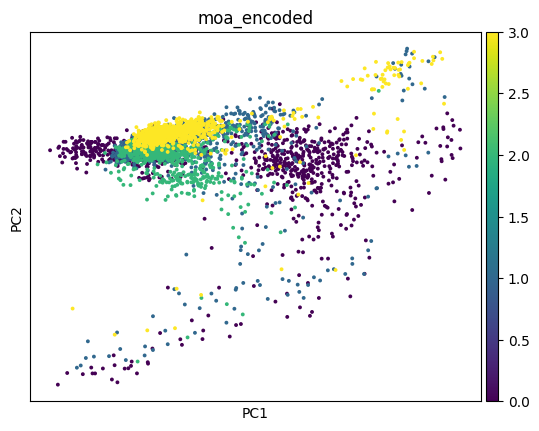

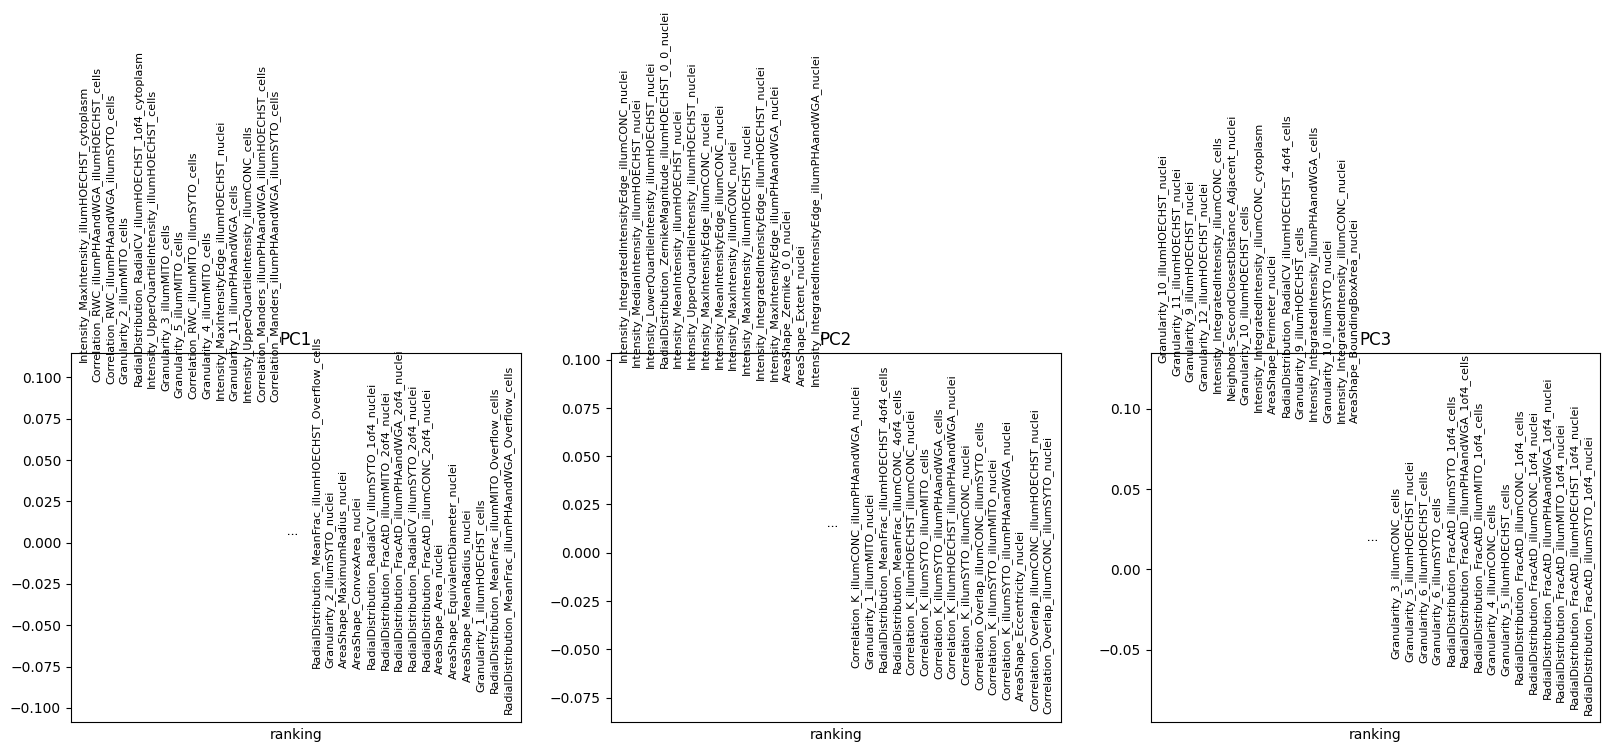

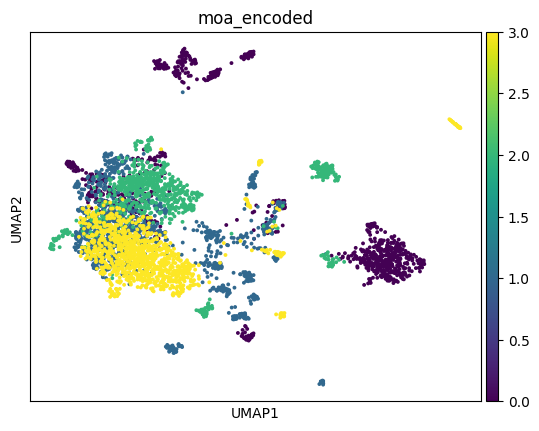

In [23]:
sc.tl.pca(adata,n_comps=100)
sc.pl.pca(adata,color='moa_encoded')
sc.pl.pca_loadings(adata)
sc.pp.neighbors(adata,n_neighbors=10)
sc.tl.umap(adata)
sc.pl.umap(adata,color='moa_encoded')

In [24]:
from sklearn.feature_selection import VarianceThreshold
numeric_df = clipped_df.select_dtypes(include=['number'])

# Step 2: Define the variance threshold
threshold = 0.1
selector = VarianceThreshold(threshold=threshold)

# Step 3: Apply variance thresholding to the numeric DataFrame
numeric_df_transformed = selector.fit_transform(numeric_df)

# Step 4: Get the selected feature indices
selected_features = selector.get_support(indices=True)

# Step 5: Get the names of the selected features
selected_feature_names = numeric_df.columns[selected_features]

# Step 6: Create a new DataFrame with the selected numeric features
numeric_df_selected = pd.DataFrame(
    numeric_df_transformed,
    columns=selected_feature_names,
    index=numeric_df.index
)

# Check the new shape of the data
print(f"New shape after variance thresholding: {numeric_df_selected.shape}")

New shape after variance thresholding: (3903, 1121)


In [25]:
numeric_df.shape

(3903, 1122)

In [26]:
corr_matrix = numeric_df_selected.corr()
threshold = 0.95

upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]

numeric_df_filtered = numeric_df_selected.drop(columns=high_corr_features)

In [27]:
numeric_df_filtered.head()

,grit,moa_encoded,batch_encoded,AreaShape_Area_nuclei,AreaShape_BoundingBoxMaximum_X_nuclei,AreaShape_BoundingBoxMaximum_Y_nuclei,AreaShape_Compactness_nuclei,AreaShape_Eccentricity_nuclei,AreaShape_Extent_nuclei,AreaShape_FormFactor_nuclei,...,RadialDistribution_ZernikePhase_illumSYTO_7_5_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_7_7_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_2_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_4_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_6_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_1_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_3_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_5_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_7_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_9_cytoplasm
0,5.053471,1.0,53.0,-1.298951,1.172667,-0.801881,0.067124,1.412065,-1.818726,-0.064050,...,-0.262488,1.061164,1.409374,0.199508,-1.379249,-0.878621,-1.060045,0.357685,1.052318,-2.238652
1,5.053471,1.0,53.0,-1.573862,-0.163187,-4.650908,-0.361411,1.879693,0.562077,0.345779,...,-2.522333,-1.082573,-1.519254,4.219759,1.077181,-3.686228,-0.674363,-0.876876,1.973040,-1.253604
2,5.053471,1.0,53.0,-1.202733,3.654621,-0.160376,2.889277,-0.071791,1.509657,-2.698889,...,3.735818,2.875254,-0.074903,0.115124,2.806154,-2.917906,0.172092,-2.096462,-1.281732,2.572879
3,5.053471,1.0,53.0,1.243969,1.499040,0.405657,-0.760992,1.467651,2.048491,0.730290,...,-2.906401,0.405404,2.287440,3.094138,-3.836092,-3.487304,1.407815,-0.097776,-2.511674,1.370972
4,5.053471,1.0,53.0,0.831604,0.899424,-0.420752,-4.136386,-2.365086,1.425541,4.073014,...,-2.667365,-0.859357,5.748360,-2.096737,0.207578,-4.340511,-1.878200,1.059821,-2.523318,-2.319214


In [28]:
clipped_df.head()

,cbkid,batch_id,cmpd_conc,moa,grit,project,NAME,moa_encoded,batch_encoded,SMILES,...,RadialDistribution_ZernikePhase_illumSYTO_7_7_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_2_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_4_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_6_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_8_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_1_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_3_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_5_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_7_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_9_cytoplasm
0,CBK308771,BJ1897173,10.0,EGFR inhibitor,5.053471,specs2k,Nazartinib,1,53,O=C(C1=CC(C)=NC=C1)NC2=NC3=CC=CC(Cl)=C3N2[C@H]...,...,1.061164,1.409374,0.199508,-1.379249,-0.788266,-0.878621,-1.060045,0.357685,1.052318,-2.238652
1,CBK308771,BJ1897173,10.0,EGFR inhibitor,5.053471,specs2k,Nazartinib,1,53,O=C(C1=CC(C)=NC=C1)NC2=NC3=CC=CC(Cl)=C3N2[C@H]...,...,-1.082573,-1.519254,4.219759,1.077181,-1.423937,-3.686228,-0.674363,-0.876876,1.973040,-1.253604
2,CBK308771,BJ1897173,10.0,EGFR inhibitor,5.053471,specs2k,Nazartinib,1,53,O=C(C1=CC(C)=NC=C1)NC2=NC3=CC=CC(Cl)=C3N2[C@H]...,...,2.875254,-0.074903,0.115124,2.806154,1.091042,-2.917906,0.172092,-2.096462,-1.281732,2.572879
3,CBK308771,BJ1897173,10.0,EGFR inhibitor,5.053471,specs2k,Nazartinib,1,53,O=C(C1=CC(C)=NC=C1)NC2=NC3=CC=CC(Cl)=C3N2[C@H]...,...,0.405404,2.287440,3.094138,-3.836092,-4.262515,-3.487304,1.407815,-0.097776,-2.511674,1.370972
4,CBK308771,BJ1897173,10.0,EGFR inhibitor,5.053471,specs2k,Nazartinib,1,53,O=C(C1=CC(C)=NC=C1)NC2=NC3=CC=CC(Cl)=C3N2[C@H]...,...,-0.859357,5.748360,-2.096737,0.207578,0.587005,-4.340511,-1.878200,1.059821,-2.523318,-2.319214


In [29]:
#numeric_df = clipped_df.select_dtypes(include=['number'])

# Identify numeric columns that were removed
discard = set(clipped_df.select_dtypes(include=['number']).columns) - set(numeric_df_filtered.columns)

# Drop those columns from clipped_df
clipped_df = clipped_df.drop(columns=discard)

clipped_df.head()

,cbkid,batch_id,moa,grit,project,NAME,moa_encoded,batch_encoded,SMILES,AreaShape_Area_nuclei,...,RadialDistribution_ZernikePhase_illumSYTO_7_5_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_7_7_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_2_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_4_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_6_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_1_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_3_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_5_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_7_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_9_cytoplasm
0,CBK308771,BJ1897173,EGFR inhibitor,5.053471,specs2k,Nazartinib,1,53,O=C(C1=CC(C)=NC=C1)NC2=NC3=CC=CC(Cl)=C3N2[C@H]...,-1.298951,...,-0.262488,1.061164,1.409374,0.199508,-1.379249,-0.878621,-1.060045,0.357685,1.052318,-2.238652
1,CBK308771,BJ1897173,EGFR inhibitor,5.053471,specs2k,Nazartinib,1,53,O=C(C1=CC(C)=NC=C1)NC2=NC3=CC=CC(Cl)=C3N2[C@H]...,-1.573862,...,-2.522333,-1.082573,-1.519254,4.219759,1.077181,-3.686228,-0.674363,-0.876876,1.973040,-1.253604
2,CBK308771,BJ1897173,EGFR inhibitor,5.053471,specs2k,Nazartinib,1,53,O=C(C1=CC(C)=NC=C1)NC2=NC3=CC=CC(Cl)=C3N2[C@H]...,-1.202733,...,3.735818,2.875254,-0.074903,0.115124,2.806154,-2.917906,0.172092,-2.096462,-1.281732,2.572879
3,CBK308771,BJ1897173,EGFR inhibitor,5.053471,specs2k,Nazartinib,1,53,O=C(C1=CC(C)=NC=C1)NC2=NC3=CC=CC(Cl)=C3N2[C@H]...,1.243969,...,-2.906401,0.405404,2.287440,3.094138,-3.836092,-3.487304,1.407815,-0.097776,-2.511674,1.370972
4,CBK308771,BJ1897173,EGFR inhibitor,5.053471,specs2k,Nazartinib,1,53,O=C(C1=CC(C)=NC=C1)NC2=NC3=CC=CC(Cl)=C3N2[C@H]...,0.831604,...,-2.667365,-0.859357,5.748360,-2.096737,0.207578,-4.340511,-1.878200,1.059821,-2.523318,-2.319214


SMILES to EMBEDDINGS

In [40]:



from transformers import T5Tokenizer, T5ForConditionalGeneration



In [12]:
tokenizer = T5Tokenizer.from_pretrained("laituan245/molt5-large-smiles2caption", model_max_length=512)
model = T5ForConditionalGeneration.from_pretrained("laituan245/molt5-large-smiles2caption")

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


model.safetensors:  55%|#####4    | 1.72G/3.13G [00:00<?, ?B/s]

In [31]:
len(unique_smiles)

111

In [ ]:
results = {}  # Create an empty dictionary to store results
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
for smile in unique_smiles:
    input_ids = tokenizer(smile, return_tensors="pt").input_ids.to(device)
    print(f"SMILES: {smile} -> Input IDs: {input_ids}")
    with torch.no_grad():
        encoder_outputs = model.encoder(input_ids)
        hidden_states = encoder_outputs.last_hidden_state  # Shape: [batch_size, seq_length, hidden_dim]

    print(f"Hidden State Shape: {hidden_states.shape}")
    
    #outputs = model.generate(input_ids, num_beams=5, max_length=512)
    #print(f"Raw outputs (token IDs): {outputs}")
    #caption = tokenizer.decode(outputs[0], skip_special_tokens=True)
    #print(f"Decoded Caption: {caption}")
    results[smile] = hidden_states.cpu().numpy()  # Convert to NumPy for easier processing
    
print(f"Results Dictionary: {results}")

In [52]:
results_df = pd.DataFrame(list(results.items()), columns=["SMILES", "hidden_state_embed"])

In [54]:
results_df.head(2)

,SMILES,hidden_state_embed
0,O=C(C1=CC(C)=NC=C1)NC2=NC3=CC=CC(Cl)=C3N2[C@H]...,"[[[0.08627525, 0.027892107, 0.042119525, 0.020..."
1,CN1CCN(CCCN2c3ccccc3Sc3ccc(cc23)C(F)(F)F)CC1,"[[[-0.00078087265, 0.00010596, 0.0011267056, 0..."


In [49]:
results_df[results_df['SMILES']=='CN1CCN(CCCN2c3ccccc3Sc3ccc(cc23)C(F)(F)F)CC1']

,SMILES,hidden_state_embed
1,CN1CCN(CCCN2c3ccccc3Sc3ccc(cc23)C(F)(F)F)CC1,{'hidden_states': [[[-0.00078087 0.00010596 ...


In [39]:
results_df.shape

(111, 2)

In [43]:
torch

<module 'torch' from '/usr/local/lib/python3.10/dist-packages/torch/__init__.py'>

In [67]:
first_embedding = results_df["hidden_state_embed"][0]

print(type(first_embedding))  # Should be <class 'numpy.ndarray'>
print(first_embedding.shape)  

<class 'numpy.ndarray'>
(1, 62, 1024)


In [68]:
mean_pooled_results = {}  # Dictionary to store the mean-pooled embeddings

for smile, hidden_states in results.items():
    hidden_states_tensor = torch.tensor(hidden_states)  # Convert NumPy array back to PyTorch tensor
    mean_pooled_embedding = hidden_states_tensor.mean(dim=1)  # Mean pooling across the token dimension
    
    mean_pooled_results[smile] = mean_pooled_embedding.squeeze(0).numpy()  # Convert back to NumPy

print(f"Mean Pooled Embeddings Shape: {list(mean_pooled_results.values())[0].shape}")  # Should be (1024,)


Mean Pooled Embeddings Shape: (1024,)


In [122]:
smiles = list(mean_pooled_results.keys())
embeddings = np.array(list(mean_pooled_results.values()))
feature_df = pd.DataFrame(embeddings, index=smiles)

# Reset the index and make 'smiles' a column
feature_df.reset_index(inplace=True)
feature_df.rename(columns={'index': 'SMILES'}, inplace=True)

# Rename the feature columns
feature_df.columns = ['SMILES'] + [f"Feature {i+1}" for i in range(feature_df.shape[1] - 1)]

# Display the resulting DataFrame
feature_df.head()



,SMILES,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 1015,Feature 1016,Feature 1017,Feature 1018,Feature 1019,Feature 1020,Feature 1021,Feature 1022,Feature 1023,Feature 1024
0,O=C(C1=CC(C)=NC=C1)NC2=NC3=CC=CC(Cl)=C3N2[C@H]...,0.023511,0.008673,-0.013507,-0.004256,-0.003712,0.003536,-0.030999,-0.029276,-0.003525,...,0.004630,0.005683,-0.017149,-0.010571,0.002156,0.008984,0.009196,-0.014913,-0.024764,-0.001301
1,CN1CCN(CCCN2c3ccccc3Sc3ccc(cc23)C(F)(F)F)CC1,-0.011943,-0.000838,0.015397,-0.022104,0.006226,-0.013005,-0.023714,-0.002558,-0.000046,...,-0.006246,0.020139,-0.022208,-0.010182,-0.020773,0.005732,-0.000300,-0.005122,-0.012689,-0.013365
2,CC(=O)C=1C=CC=2SC=3C=CC=CC3N(CCCN4CCC(CCO)CC4)...,0.024306,-0.003669,0.010129,-0.004959,-0.014157,-0.000884,-0.018657,-0.012059,0.005279,...,0.005104,0.010716,-0.004790,0.003182,-0.009942,-0.003950,0.009428,-0.002428,-0.019075,0.008345
3,CN(C)CCCN1c2ccccc2Sc2ccccc12,-0.021933,-0.011514,0.013362,-0.016390,0.010658,-0.017980,-0.024982,-0.000617,0.008829,...,-0.003364,0.028381,-0.010617,-0.015300,-0.031601,0.003282,0.005454,0.010193,-0.011447,-0.009765
4,COC1=C(C=C(C2=C1)N=CN=C2NC3=CC(Br)=CC=C3)OC,0.022386,0.004753,-0.008136,-0.005745,-0.007968,-0.001043,-0.025475,-0.034590,0.021114,...,-0.000644,0.003125,-0.016440,-0.008706,0.007324,0.019776,0.009022,-0.013330,-0.022557,0.001948


In [123]:
moa_smiles.shape

(3903, 1130)

In [124]:
moa_smiles_norep = moa_smiles.drop_duplicates(subset='SMILES', keep='first')

In [125]:
moa_smiles_norep.shape

(111, 1130)

In [126]:
moa_smiles_norep.head()

,AreaShape_Area_nuclei,AreaShape_BoundingBoxArea_nuclei,AreaShape_BoundingBoxMaximum_X_nuclei,AreaShape_BoundingBoxMaximum_Y_nuclei,AreaShape_BoundingBoxMinimum_X_nuclei,AreaShape_BoundingBoxMinimum_Y_nuclei,AreaShape_Center_X_nuclei,AreaShape_Center_Y_nuclei,AreaShape_Compactness_nuclei,AreaShape_ConvexArea_nuclei,...,cbkid,batch_id,cmpd_conc,moa,grit,project,NAME,moa_encoded,SMILES,batch_encoded
0,-1.298951,-0.498654,1.172667,-0.801881,1.241957,-0.853968,1.182454,-0.814591,0.067124,-1.399310,...,CBK308771,BJ1897173,10.0,EGFR inhibitor,5.053471,specs2k,Nazartinib,1,O=C(C1=CC(C)=NC=C1)NC2=NC3=CC=CC(Cl)=C3N2[C@H]...,53
18,-2.824703,-3.158143,0.607206,-2.575452,0.678634,-2.491664,0.698977,-2.522825,-2.269226,-3.110697,...,CBK023992,BJ1894820,10.0,dopamine receptor antagonist,3.593970,specs2k,TRIFLUOPERAZINE HYDROCHLORIDE,3,CN1CCN(CCCN2c3ccccc3Sc3ccc(cc23)C(F)(F)F)CC1,9
27,-1.615098,-2.654127,-0.633771,-1.028294,-0.671072,-0.972266,-0.642343,-0.961213,-1.785122,-1.681185,...,CBK200900,BJ1896924,10.0,dopamine receptor antagonist,2.520787,specs2k,piperacetazine,3,CC(=O)C=1C=CC=2SC=3C=CC=CC3N(CCCN4CCC(CCO)CC4)...,43
108,0.198499,0.153033,-0.450844,-1.492025,-0.364236,-1.346930,-0.430275,-1.398683,-0.800587,0.255552,...,CBK011567,BJ1894765,10.0,dopamine receptor antagonist,1.427693,specs2k,PROMAZINE HYDROCHLORIDE,3,CN(C)CCCN1c2ccccc2Sc2ccccc12,7
117,-4.468098,-5.509177,0.583047,1.615918,0.715227,1.568017,0.630348,1.581962,-3.812802,-4.448082,...,CBK013251,BJ1897081,10.0,EGFR inhibitor,4.081928,specs2k,PD153035 (Hydrochloride),1,COC1=C(C=C(C2=C1)N=CN=C2NC3=CC(Br)=CC=C3)OC,45


In [127]:
feature_df = pd.merge(feature_df, moa_smiles_norep[['SMILES', 'NAME']], on='SMILES', how='left')


In [128]:
feature_df.head()

,SMILES,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 1016,Feature 1017,Feature 1018,Feature 1019,Feature 1020,Feature 1021,Feature 1022,Feature 1023,Feature 1024,NAME
0,O=C(C1=CC(C)=NC=C1)NC2=NC3=CC=CC(Cl)=C3N2[C@H]...,0.023511,0.008673,-0.013507,-0.004256,-0.003712,0.003536,-0.030999,-0.029276,-0.003525,...,0.005683,-0.017149,-0.010571,0.002156,0.008984,0.009196,-0.014913,-0.024764,-0.001301,Nazartinib
1,CN1CCN(CCCN2c3ccccc3Sc3ccc(cc23)C(F)(F)F)CC1,-0.011943,-0.000838,0.015397,-0.022104,0.006226,-0.013005,-0.023714,-0.002558,-0.000046,...,0.020139,-0.022208,-0.010182,-0.020773,0.005732,-0.000300,-0.005122,-0.012689,-0.013365,TRIFLUOPERAZINE HYDROCHLORIDE
2,CC(=O)C=1C=CC=2SC=3C=CC=CC3N(CCCN4CCC(CCO)CC4)...,0.024306,-0.003669,0.010129,-0.004959,-0.014157,-0.000884,-0.018657,-0.012059,0.005279,...,0.010716,-0.004790,0.003182,-0.009942,-0.003950,0.009428,-0.002428,-0.019075,0.008345,piperacetazine
3,CN(C)CCCN1c2ccccc2Sc2ccccc12,-0.021933,-0.011514,0.013362,-0.016390,0.010658,-0.017980,-0.024982,-0.000617,0.008829,...,0.028381,-0.010617,-0.015300,-0.031601,0.003282,0.005454,0.010193,-0.011447,-0.009765,PROMAZINE HYDROCHLORIDE
4,COC1=C(C=C(C2=C1)N=CN=C2NC3=CC(Br)=CC=C3)OC,0.022386,0.004753,-0.008136,-0.005745,-0.007968,-0.001043,-0.025475,-0.034590,0.021114,...,0.003125,-0.016440,-0.008706,0.007324,0.019776,0.009022,-0.013330,-0.022557,0.001948,PD153035 (Hydrochloride)


In [129]:
feature_df = pd.merge(feature_df, moa_smiles_norep[['SMILES', 'moa']], on='SMILES', how='left')


In [130]:
feature_df.head(1)

,SMILES,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 1017,Feature 1018,Feature 1019,Feature 1020,Feature 1021,Feature 1022,Feature 1023,Feature 1024,NAME,moa
0,O=C(C1=CC(C)=NC=C1)NC2=NC3=CC=CC(Cl)=C3N2[C@H]...,0.023511,0.008673,-0.013507,-0.004256,-0.003712,0.003536,-0.030999,-0.029276,-0.003525,...,-0.017149,-0.010571,0.002156,0.008984,0.009196,-0.014913,-0.024764,-0.001301,Nazartinib,EGFR inhibitor


In [148]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
feature_df['moa_encoded'] = le.fit_transform(feature_df['moa'])
moa_mapping = list(zip(le.classes_, range(len(le.classes_))))
print("MOA Mapping:", moa_mapping)

MOA Mapping: [('CDK inhibitor', 0), ('EGFR inhibitor', 1), ('PI3K inhibitor', 2), ('dopamine receptor antagonist', 3)]


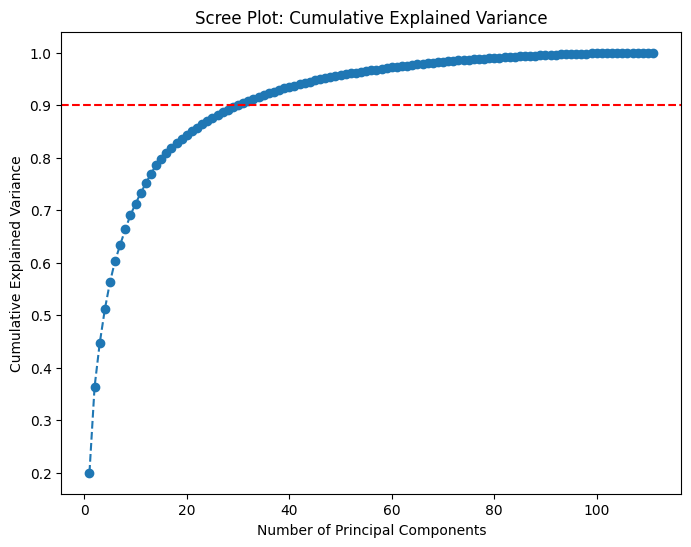

In [149]:
df_num=feature_df.select_dtypes(include='number')

scaler=StandardScaler()
test_pca=scaler.fit_transform(df_num)
df_pca=pd.DataFrame(test_pca)
pca = PCA()
pca.fit(df_pca)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot: Cumulative Explained Variance')
plt.axhline(y=0.90, color='r', linestyle='--')  
plt.show()

/usr/local/lib/python3.10/dist-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


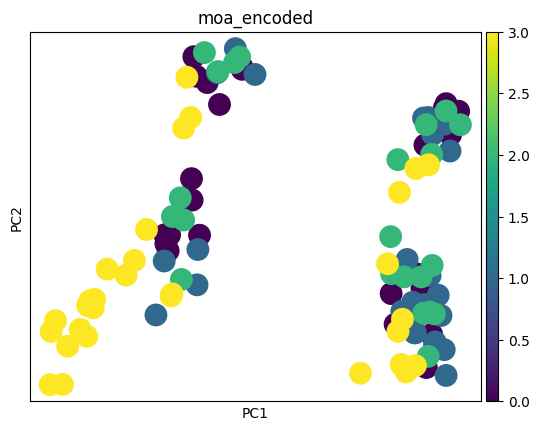

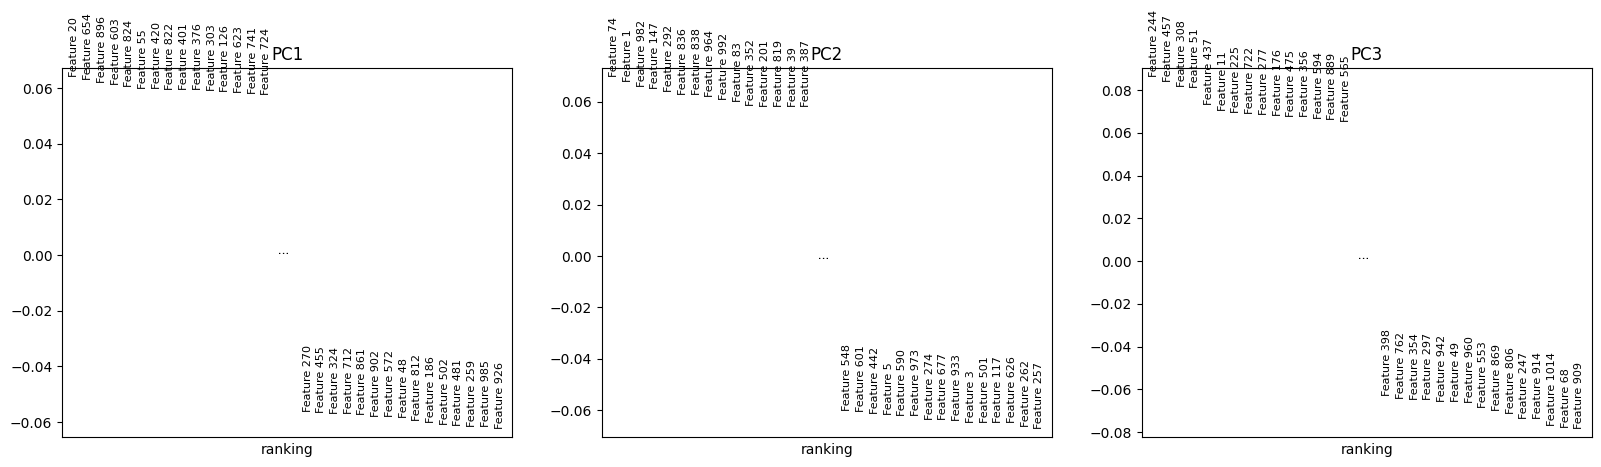

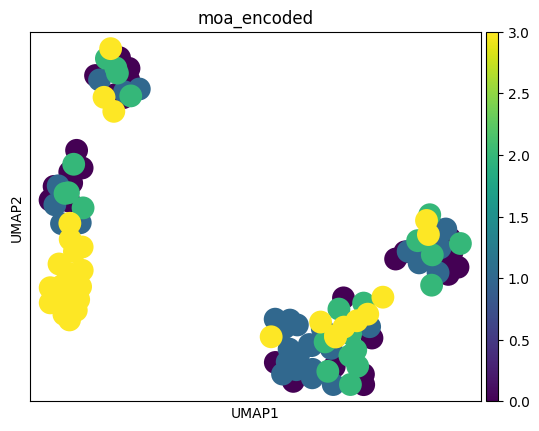

In [170]:
metadata = feature_df[['moa', 'NAME', 'SMILES', 'moa_encoded']]
features = feature_df.drop(columns=['moa', 'NAME', 'SMILES', 'moa_encoded'])  # Excluding metadata columns

# Create an AnnData object with the feature matrix
adata = sc.AnnData(features,obs=metadata)
#adata = sc.AnnData(X=feat.drop(columns=['Feature822 ','Feature 164']),obs=meta)
sc.pp.scale(adata)
# Add the metadata (including 'moa_encoded') to the .obs attribute

#adata.obs['moa_encoded'] = metadata['moa_encoded']

# Perform PCA
sc.tl.pca(adata, n_comps=50)

# Visualize PCA with coloring based on 'moa_encoded'
sc.pl.pca(adata, color='moa_encoded',legend_loc="right margin")

# Visualize PCA loadings
sc.pl.pca_loadings(adata)

# Compute neighbors
sc.pp.neighbors(adata, n_neighbors=10)

# Compute UMAP
sc.tl.umap(adata)

# Visualize UMAP with coloring based on 'moa_encoded'
sc.pl.umap(adata, color='moa_encoded',legend_loc="right margin")

In [160]:
adata.obs['moa_encoded'] = adata.obs['moa_encoded'].astype('category')

